***Milestone 1 phase 2***

by. Haikal Ramdhan Usman

Analisis ini bertujuan untuk memprediksi apakah seorang customer akan  churned atau tidak. Churn adalah aturan bisnis yang mengacu kepada apakah perusahaan akan kehilangan pelanggan atau tidak.

Dataset dapat di lihat di laman https://www.kaggle.com/blastchar/telco-customer-churn

# Import Library

Import seluruh library yang akan dipakai:

* pandas: untuk loading, manipulasi dan preprocessing dataset
* numpy: untuk perhitungan numerik
* seaborn: untuk memvisualisasikan data
* matplotlib: digunakan untuk memvisualisasikan data
* train_test_split : Untuk membagi data menjadi data train dan data test
* GridSearchCV : untuk melakukan hyperparametertuning
* tensorflow dan keras: untuk melakukan pemodelan
* Pipeline : membuat pipeline
* StandardScaler: melakukan scaling pada data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# EDA

In [306]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [176]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [177]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen mempunyai nilai 0 kerana memang value nya boolean yaitu 1 dan 0 (True or False). Tenure juga memiliki nilai 0, saya akan melakukan explorasi lebih lanjut untuk menentukan apakah akan didrop atau tidak.

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dari info diatas, pandas tidak mendeteksi adanya null value. Selanjutnya saya akan ploting distribusi dari kolom numeric.

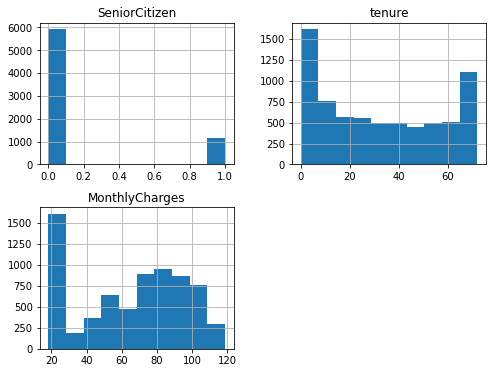

In [179]:
df.hist(figsize=(8,6))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

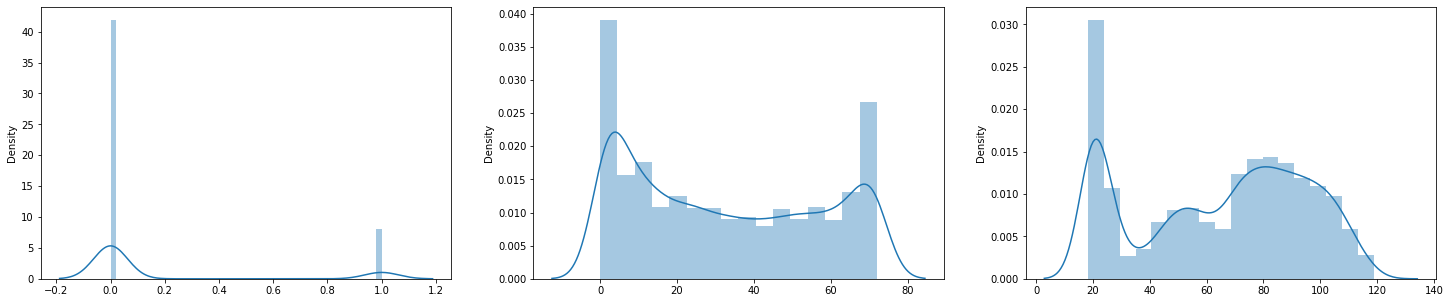

In [180]:
fig, ax = plt.subplots(ncols=3, figsize=(25,5))
sns.distplot(x=df['SeniorCitizen'], ax=ax[0])
sns.distplot(x=df['tenure'], ax=ax[1])
sns.distplot(x=df['MonthlyCharges'], ax=ax[2])
plt.show()

SeniorCitizen terlihat diskrit karena berupa kategorikal, tenure dan MonthlyCharges skewed ke kanan. Ada satu kolom yang kurang disini yaitu TotalCharges. Kalo liat sekilas dari data, isi dari TotalCharges adalah numeric tapi di info datatype nya object.

In [181]:
dfnew = df.copy()

In [182]:
dfnew['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [183]:
dfnew[dfnew['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [184]:
dfnew[dfnew['TotalCharges']==' '].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

Tadinya sempat mengubah dtype dari TotalCharges menjadi numeric tapi error yang ternyata ada nilai " " pada data tersebut dan bisa dilihat jumlah nya ada 11. Karena saya curiga kalau data TotalCharge yang kosong itu karena tenure nya 0 maka saya coba lihat data tenure = 0.

In [185]:
dfnew[dfnew['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [186]:
dfnew[dfnew['tenure']==0].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

Bisa dipastikan bahwa TotalCharges yang kosong itu karena tenure nya 0. Selanjutnya saya coba merubah dtype TotalCharges menjadi numeric.

In [187]:
dfnew[['TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   TotalCharges  7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


In [188]:
dfnew['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce') # agar yang error menjadi NaN

In [189]:
dfnew[['TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [190]:
dfnew[['TotalCharges']].isnull().sum()

TotalCharges    11
dtype: int64

Ada 11 nilai null di TotalCharge. Akan saya drop saja karena jika TotalCharges null artinya tenure=0. Jika tenure=0, maka saya anggap pelanggan tersebut membatalkan.

In [191]:
dfnew.dropna(inplace=True)

In [192]:
dfnew[['TotalCharges']].isnull().sum()

TotalCharges    0
dtype: int64

In [193]:
dfnew[dfnew['tenure']==0].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

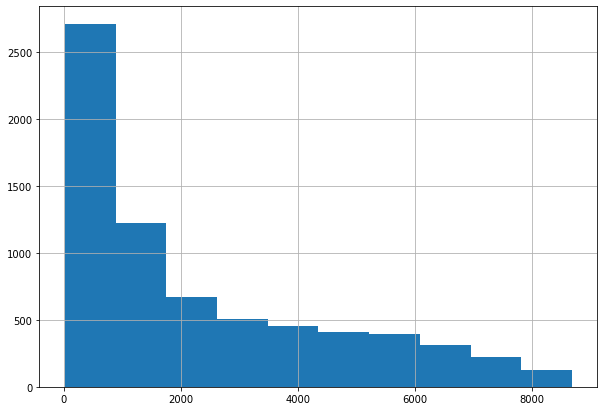

In [194]:
dfnew['TotalCharges'].hist(figsize=(10,7))
plt.show()

Distribusi dari TotalCharges skewed ke kanan

In [195]:
dfnew.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [196]:
cols=dfnew.drop(dfnew.describe().columns, axis=1)
for i in cols:
  print(i,':')
  print(dfnew[i].unique())

customerID :
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :
['Female' 'Male']
Partner :
['Yes' 'No']
Dependents :
['No' 'Yes']
PhoneService :
['No' 'Yes']
MultipleLines :
['No phone service' 'No' 'Yes']
InternetService :
['DSL' 'Fiber optic' 'No']
OnlineSecurity :
['No' 'Yes' 'No internet service']
OnlineBackup :
['Yes' 'No' 'No internet service']
DeviceProtection :
['No' 'Yes' 'No internet service']
TechSupport :
['No' 'Yes' 'No internet service']
StreamingTV :
['No' 'Yes' 'No internet service']
StreamingMovies :
['No' 'Yes' 'No internet service']
Contract :
['Month-to-month' 'One year' 'Two year']
PaperlessBilling :
['Yes' 'No']
PaymentMethod :
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :
['No' 'Yes']


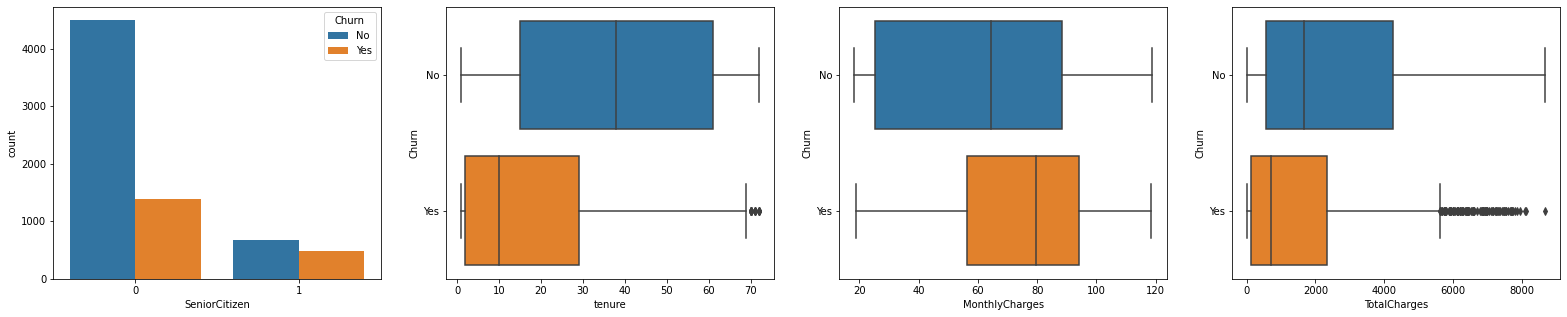

In [197]:
fig, ax = plt.subplots(ncols=4, figsize=(27,5))
sns.countplot(x='SeniorCitizen', data=dfnew, hue='Churn', ax=ax[0])
sns.boxplot(x='tenure', y='Churn', data=dfnew, ax=ax[1])
sns.boxplot(x='MonthlyCharges', y='Churn', data=dfnew, ax=ax[2])
sns.boxplot(x='TotalCharges', y='Churn', data=dfnew, ax=ax[3])
plt.show()

Data dari pelanggan kebanyakan bukan Senior. Kebanyakan Customer yang churn nya Yes itu yg tenure nya sekutaran 0 sampai 30, dan MonthlyCharges nya sekitaran 60-80.

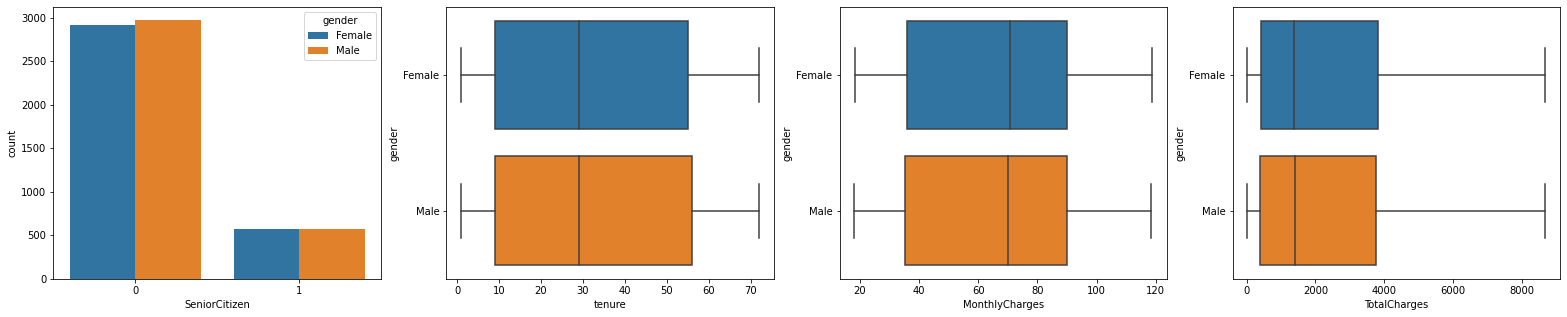

In [198]:
fig, ax = plt.subplots(ncols=4, figsize=(27,5))
sns.countplot(x='SeniorCitizen', data=dfnew, hue='gender', ax=ax[0])
sns.boxplot(x='tenure', y='gender', data=dfnew, ax=ax[1])
sns.boxplot(x='MonthlyCharges', y='gender', data=dfnew, ax=ax[2])
sns.boxplot(x='TotalCharges', y='gender', data=dfnew, ax=ax[3])
plt.show()

Gender terlihat seimbang.

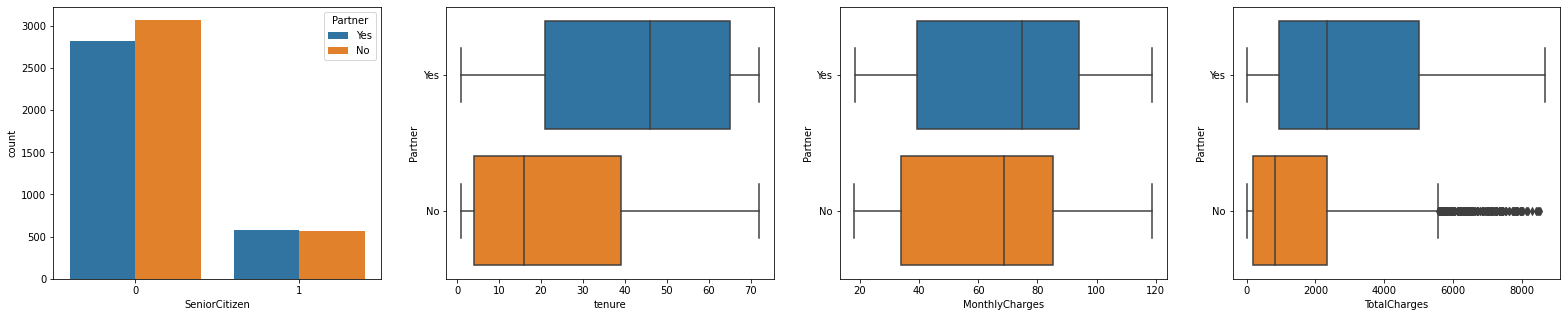

In [199]:
fig, ax = plt.subplots(ncols=4, figsize=(27,5))
sns.countplot(x='SeniorCitizen', data=dfnew, hue='Partner', ax=ax[0])
sns.boxplot(x='tenure', y='Partner', data=dfnew, ax=ax[1])
sns.boxplot(x='MonthlyCharges', y='Partner', data=dfnew, ax=ax[2])
sns.boxplot(x='TotalCharges', y='Partner', data=dfnew, ax=ax[3])
plt.show()

SeniorCitizen yang memiliki partner dan tidak terlihat hampir seimbang. Sementara untuk tenure nya customer yang mempunyai partner disekitaran 20-60

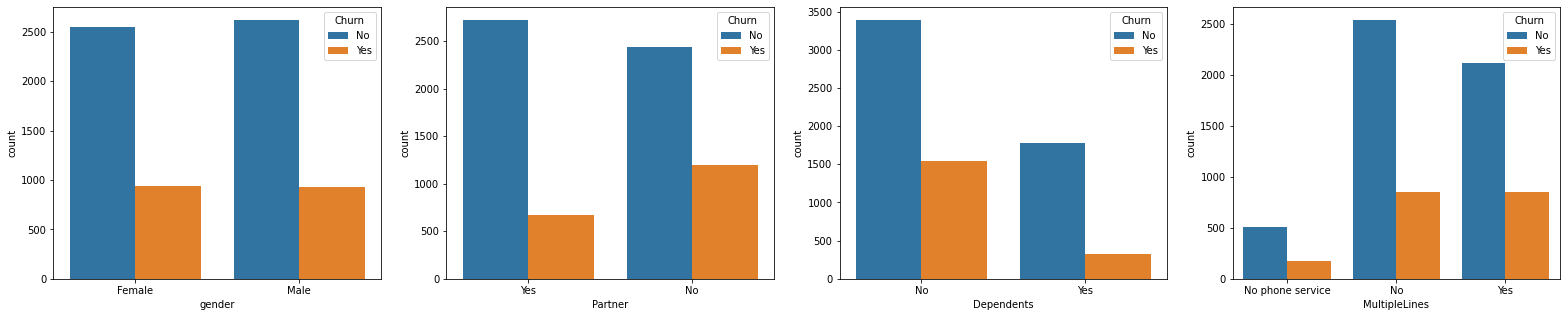

In [200]:
fig, ax = plt.subplots(ncols=4, figsize=(27,5))
sns.countplot(x='gender', data=dfnew, hue='Churn', ax=ax[0])
sns.countplot(x='Partner', data=dfnew, hue='Churn', ax=ax[1])
sns.countplot(x='Dependents', data=dfnew, hue='Churn', ax=ax[2])
sns.countplot(x='MultipleLines', data=dfnew, hue='Churn', ax=ax[3])
plt.show()

Terlihat jika dibandingkan gendernya terlihat seimbang.

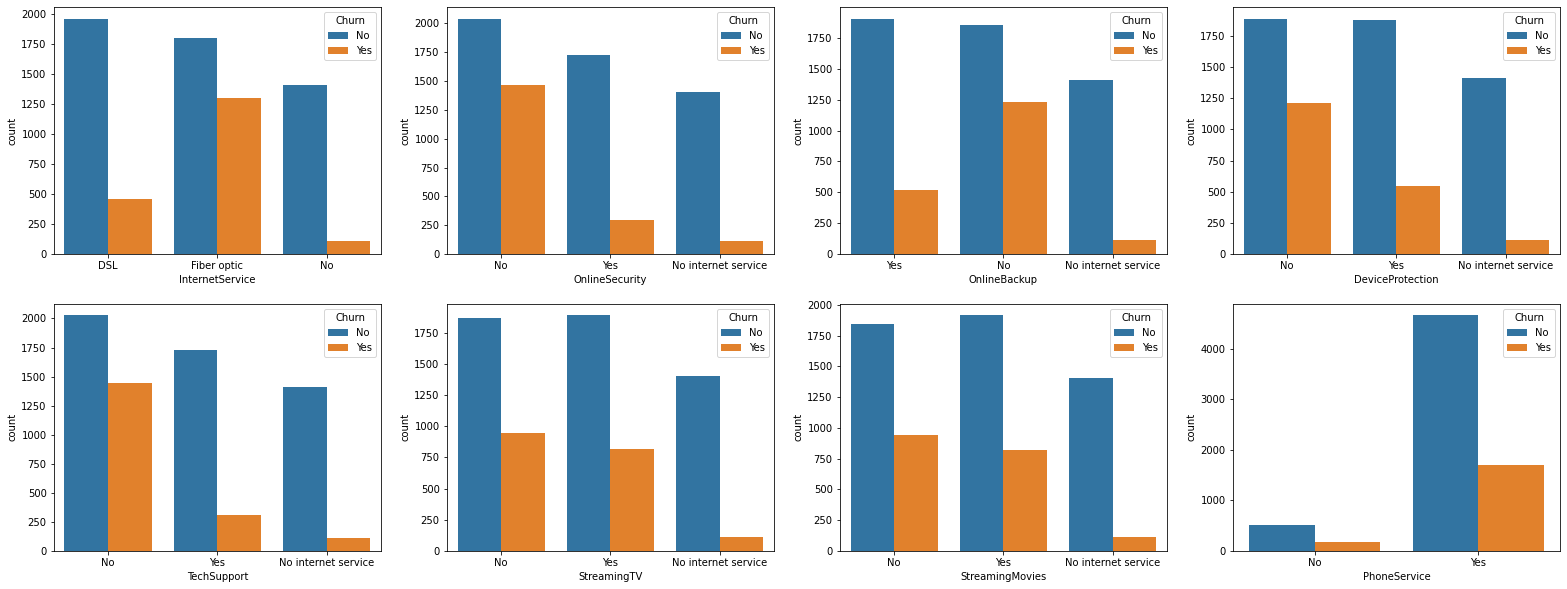

In [201]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(27,10))
sns.countplot(x='InternetService', data=dfnew, hue='Churn', ax=ax[0][0])
sns.countplot(x='OnlineSecurity', data=dfnew, hue='Churn', ax=ax[0][1])
sns.countplot(x='OnlineBackup', data=dfnew, hue='Churn', ax=ax[0][2])
sns.countplot(x='DeviceProtection', data=dfnew, hue='Churn', ax=ax[0][3])

sns.countplot(x='TechSupport', data=dfnew, hue='Churn', ax=ax[1][0])
sns.countplot(x='StreamingTV', data=dfnew, hue='Churn', ax=ax[1][1])
sns.countplot(x='StreamingMovies', data=dfnew, hue='Churn', ax=ax[1][2])
sns.countplot(x='PhoneService', data=dfnew, hue='Churn', ax=ax[1][3])
plt.show()

Kebanyakan customer yang churned adalah yang InternetService nya Fiber optic, lalu customer yang tidak mengambil OnlineSecurity, Orang yang tidak memiliki OnlineBackup, DeviceProtection, TechSupport, StreamingTV dan StreamingMovies. Terakhir, orang yang mengambil PhoneService lebuhbanyak yang churned.

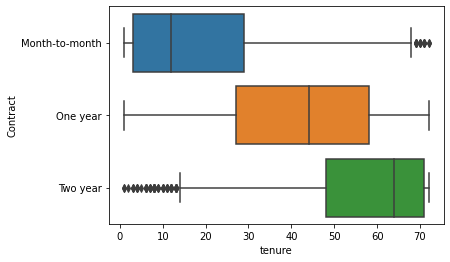

In [202]:
sns.boxplot(x='tenure', y='Contract', data=dfnew)

Orang yang tenurenya sekitaran 0-30 kontraknya  lebih banyak yang Month-to-month. Orang yang tenurenya 20-60 contractnya lebih banyak One year. dan sisanya lebih banyak yang ambil Two Year.

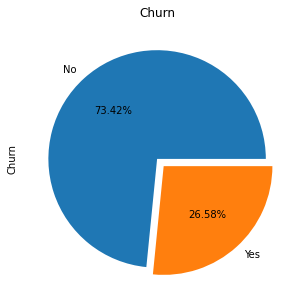

In [203]:
dfnew.Churn.value_counts().plot(kind='pie', title="Churn", autopct='%1.2f%%', explode=[0,0.09], figsize=(5,5))
plt.show()

Orang yang Churn nya 0 lebih banyak dengan presentasi 73.42% : 26.58%

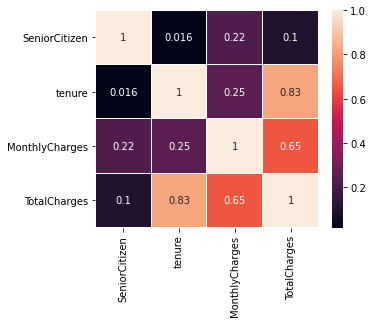

In [204]:
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(dfnew.corr(), annot=True, linewidths=.05, ax=ax)

tenure dan MonthlyCharges sama-sama berkorelasi dengan TotalCharges. Ini karena TotalCharges bergantung sama tenure dan MonthlyCharge. naiknya tenure dan MonthlyCharges menyebabkan bertambahnya TotalCharges.

In [205]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Disini saya akan melakukan feature selection dengan cara drop kolom-kolom yang tidak penting.

In [206]:
data=dfnew.drop(columns=['customerID','gender','Partner','PhoneService','PaperlessBilling','PaymentMethod','TotalCharges','Contract'])

In [207]:
data

,SeniorCitizen,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn
0,0,No,1,No phone service,DSL,No,Yes,No,No,No,No,29.85,No
1,0,No,34,No,DSL,Yes,No,Yes,No,No,No,56.95,No
2,0,No,2,No,DSL,Yes,Yes,No,No,No,No,53.85,Yes
3,0,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,42.30,No
4,0,No,2,No,Fiber optic,No,No,No,No,No,No,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,84.80,No
7039,0,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,103.20,No
7040,0,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,29.60,No
7041,1,No,4,Yes,Fiber optic,No,No,No,No,No,No,74.40,Yes


In [208]:
cols=data.drop(data.describe().columns, axis=1)
for i in cols:
  print(i,':')
  print(data[i].unique())

Dependents :
['No' 'Yes']
MultipleLines :
['No phone service' 'No' 'Yes']
InternetService :
['DSL' 'Fiber optic' 'No']
OnlineSecurity :
['No' 'Yes' 'No internet service']
OnlineBackup :
['Yes' 'No' 'No internet service']
DeviceProtection :
['No' 'Yes' 'No internet service']
TechSupport :
['No' 'Yes' 'No internet service']
StreamingTV :
['No' 'Yes' 'No internet service']
StreamingMovies :
['No' 'Yes' 'No internet service']
Churn :
['No' 'Yes']


Data yang No akan saya replace dengan 0 dan Yes replace dengan 1.

In [209]:
new = data.replace({'MultipleLines':'No','Dependents':'No','OnlineSecurity':'No',
              'OnlineBackup':'No','DeviceProtection':'No','TechSupport':'No',
              'StreamingTV':'No','StreamingMovies':'No','Churn':'No'},0)

In [210]:
new = new.replace({'MultipleLines':'No phone service','OnlineSecurity':'No internet service',
              'OnlineBackup':'No internet service','DeviceProtection':'No internet service','TechSupport':'No internet service',
              'StreamingTV':'No internet service','StreamingMovies':'No internet service'},0)

In [211]:
new = new.replace({'MultipleLines':'Yes','Dependents':'Yes','OnlineSecurity':'Yes',
              'OnlineBackup':'Yes','DeviceProtection':'Yes','TechSupport':'Yes',
              'StreamingTV':'Yes','StreamingMovies':'Yes','Churn':'Yes'},1)

get_dummies untuk kolom InternetService

In [212]:
new = pd.get_dummies(new, columns=['InternetService'])

In [213]:
new.head(10)

,SeniorCitizen,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,0,1,0,0,0,0,29.85,0,1,0,0
1,0,0,34,0,1,0,1,0,0,0,56.95,0,1,0,0
2,0,0,2,0,1,1,0,0,0,0,53.85,1,1,0,0
3,0,0,45,0,1,0,1,1,0,0,42.30,0,1,0,0
4,0,0,2,0,0,0,0,0,0,0,70.70,1,0,1,0
5,0,0,8,1,0,0,1,0,1,1,99.65,1,0,1,0
6,0,1,22,1,0,1,0,0,1,0,89.10,0,0,1,0
7,0,0,10,0,1,0,0,0,0,0,29.75,0,1,0,0
8,0,0,28,1,0,0,1,1,1,1,104.80,1,0,1,0
9,0,1,62,0,1,1,0,0,0,0,56.15,0,1,0,0


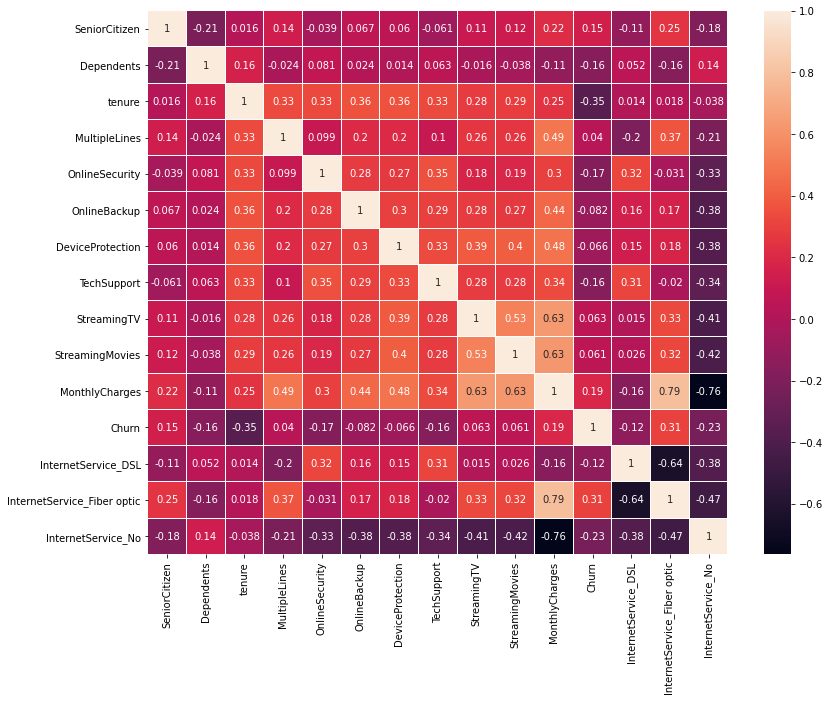

In [214]:
fig, ax = plt.subplots(figsize=(13,10))
sns.heatmap(new.corr(), annot=True, linewidths=.05, ax=ax)

InternetService_No mempunyai korelasi negative terhadap MonthlyCharges. Internet_Fiber optic berkorelasi negative dengan InternetService_DSL dan positiv dengan MonthlyCHarges. StreamingTV dan StreamingMovies juga memiliki korelasi positiv dengan MonthlyCHarges.

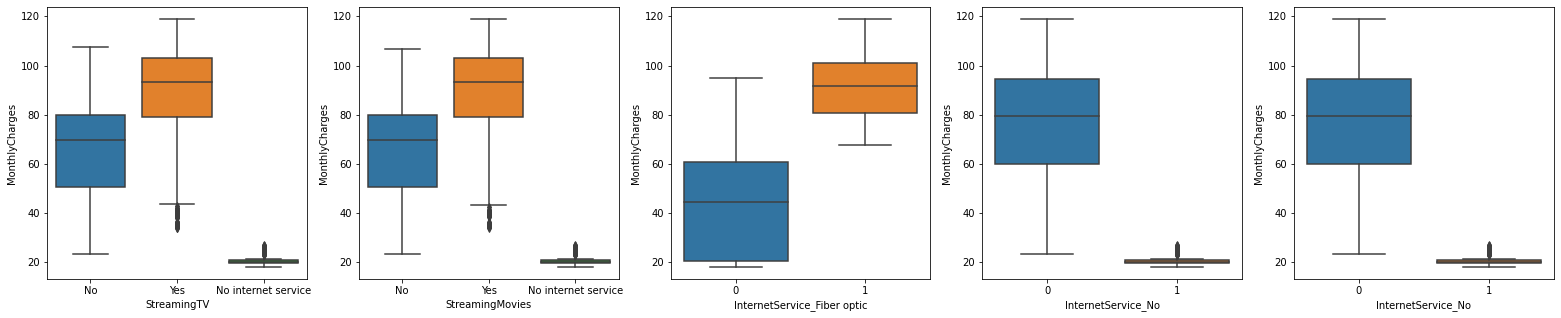

In [215]:
fig, ax = plt.subplots(ncols=5, figsize=(27,5))
sns.boxplot(x='StreamingTV', y='MonthlyCharges', data=dfnew, ax=ax[0])
sns.boxplot(x='StreamingMovies', y='MonthlyCharges', data=dfnew, ax=ax[1])
sns.boxplot(x='InternetService_Fiber optic', y='MonthlyCharges', data=new, ax=ax[2])
sns.boxplot(x='InternetService_No', y='MonthlyCharges', data=new, ax=ax[3])
sns.boxplot(x='InternetService_No', y='MonthlyCharges', data=new, ax=ax[4])
plt.show()

Kebanyakan orang yang StreamingTV dan Streaming Movies MonthlyCharges nya lebih banyak daripada yang tidak. Kebanyakan yang InternetService_Fiber optik MonthlyCharges nya lebih banyak.

In [216]:
X = new.drop(columns='Churn')
y = new['Churn']

In [217]:
X.shape

(7032, 14)

In [218]:
y.shape

(7032,)

In [219]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.1, random_state=42)

In [220]:
Xtr, Xva, ytr, yva = train_test_split(Xtr, ytr, test_size=0.2, random_state=42)

In [221]:
print(Xtr.shape)
print(ytr.shape)

(5062, 14)
(5062,)


# Model Definition, Model Training dan Model Evaluation

## Ceate Layer

In [222]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [223]:
def create_layers(weight_init=tf.keras.initializers.GlorotNormal(),hidden_act_func='relu'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(10,input_dim=14,kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.Dense(10,kernel_initializer=weight_init, activation=hidden_act_func))
  model.add(keras.layers.Dense(5,kernel_initializer=weight_init, activation=hidden_act_func))
  

  # Output layer
  model.add(keras.layers.Dense(2, activation="softmax"))
  return model

## Membandingkan antara Glorot, He dan Random normal Initializer

In [224]:
#Glorot
initializer1 = tf.keras.initializers.GlorotNormal() #Glorot Initializer
glorot_model = create_layers(weight_init = initializer1)

#He Initializer
initializer2 = tf.keras.initializers.HeNormal()
he_model = create_layers(weight_init = initializer2)

#Random normal Initializer
initializer3 = tf.keras.initializers.HeNormal()
random_normal_model = create_layers(weight_init = initializer3)

### Summary dari setiap model

In [225]:
print(glorot_model.summary())
print(he_model.summary())
print(random_normal_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 327
Trainable params: 327
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                150       
_______________________________

### Compiling model

In [226]:
glorot_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [227]:
he_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [228]:
random_normal_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

### Training model

In [230]:
history1 = glorot_model.fit(Xtr, ytr, epochs=15, validation_data=(Xva, yva))

Epoch 1/15
159/159 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.7973 - val_loss: 0.4376 - val_accuracy: 0.7852
Epoch 2/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7969 - val_loss: 0.4382 - val_accuracy: 0.7923
Epoch 3/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.7938 - val_loss: 0.4415 - val_accuracy: 0.7907
Epoch 4/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7944 - val_loss: 0.4477 - val_accuracy: 0.7907
Epoch 5/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7930 - val_loss: 0.4376 - val_accuracy: 0.7820
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.7959 - val_loss: 0.4363 - val_accuracy: 0.7907
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.7934 - val_loss: 0.4366 - val_accuracy: 0.7915
Epoch 

In [231]:
history2 = he_model.fit(Xtr, ytr, epochs=15, validation_data=(Xva, yva))

Epoch 1/15
159/159 [==============================] - 1s 3ms/step - loss: 0.5604 - accuracy: 0.7542 - val_loss: 0.4947 - val_accuracy: 0.7686
Epoch 2/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7760 - val_loss: 0.4781 - val_accuracy: 0.7820
Epoch 3/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7827 - val_loss: 0.4745 - val_accuracy: 0.7701
Epoch 4/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7835 - val_loss: 0.5105 - val_accuracy: 0.7717
Epoch 5/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.7825 - val_loss: 0.4818 - val_accuracy: 0.7867
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4524 - accuracy: 0.7864 - val_loss: 0.4646 - val_accuracy: 0.7733
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.7884 - val_loss: 0.4474 - val_accuracy: 0.7883
Epoch 

In [232]:
history3 = random_normal_model.fit(Xtr, ytr, epochs=15, validation_data=(Xva, yva))

Epoch 1/15
159/159 [==============================] - 1s 3ms/step - loss: 0.7972 - accuracy: 0.6869 - val_loss: 0.5002 - val_accuracy: 0.7496
Epoch 2/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7639 - val_loss: 0.4874 - val_accuracy: 0.7859
Epoch 3/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7924 - val_loss: 0.4782 - val_accuracy: 0.7844
Epoch 4/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7868 - val_loss: 0.4896 - val_accuracy: 0.7883
Epoch 5/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7936 - val_loss: 0.4645 - val_accuracy: 0.7780
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7961 - val_loss: 0.4595 - val_accuracy: 0.7859
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.7942 - val_loss: 0.4551 - val_accuracy: 0.7859
Epoch 

### Model Evaluation

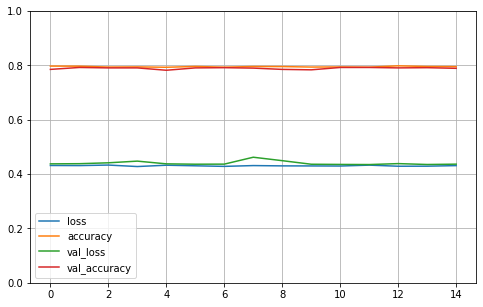

In [233]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [235]:
glorot_model.evaluate(Xts, yts)

22/22 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7741


[0.45295780897140503, 0.7741477489471436]

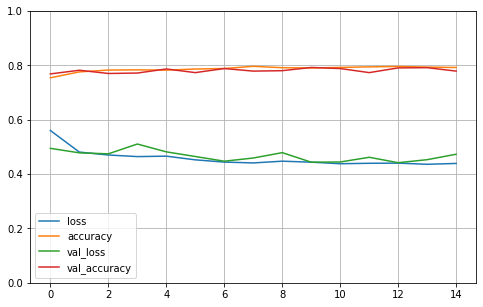

In [236]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [237]:
he_model.evaluate(Xts, yts)

22/22 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7756


[0.4862837791442871, 0.7755681872367859]

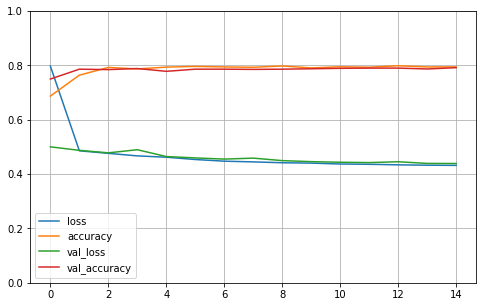

In [238]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [240]:
random_normal_model.evaluate(Xts, yts)

22/22 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7685


[0.45946004986763, 0.7684659361839294]

Karena GLorot Initializer terlihat lebih baik karena tidak overfitting jadi saya akan pakai GLorot Initializer

## Membandingkan Activation Function relu dan sigmoid

In [241]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [242]:
relu = keras.activations.relu
sigmoid = keras.activations.sigmoid

In [243]:
relu_model = create_layers(weight_init = initializer1, hidden_act_func=relu)
sgm_model = create_layers(weight_init = initializer1, hidden_act_func=sigmoid)

### COmpiling Model

In [244]:
relu_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
sgm_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

Model Training

In [245]:
hist1 = relu_model.fit(Xtr, ytr, epochs=15, validation_data=(Xva, yva))

Epoch 1/15
159/159 [==============================] - 1s 3ms/step - loss: 0.5115 - accuracy: 0.7600 - val_loss: 0.4795 - val_accuracy: 0.7907
Epoch 2/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7857 - val_loss: 0.4666 - val_accuracy: 0.7867
Epoch 3/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7880 - val_loss: 0.4622 - val_accuracy: 0.7875
Epoch 4/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.7912 - val_loss: 0.4596 - val_accuracy: 0.7891
Epoch 5/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7914 - val_loss: 0.4469 - val_accuracy: 0.7844
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7961 - val_loss: 0.4435 - val_accuracy: 0.7930
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.7920 - val_loss: 0.4432 - val_accuracy: 0.7915
Epoch 

In [246]:
hist2 = sgm_model.fit(Xtr, ytr, epochs=15, validation_data=(Xva, yva))

Epoch 1/15
159/159 [==============================] - 1s 3ms/step - loss: 0.5995 - accuracy: 0.7234 - val_loss: 0.5728 - val_accuracy: 0.7243
Epoch 2/15
159/159 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7379 - val_loss: 0.5478 - val_accuracy: 0.7243
Epoch 3/15
159/159 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7379 - val_loss: 0.5144 - val_accuracy: 0.7243
Epoch 4/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.7379 - val_loss: 0.4903 - val_accuracy: 0.7243
Epoch 5/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4730 - accuracy: 0.7699 - val_loss: 0.4687 - val_accuracy: 0.7828
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.7942 - val_loss: 0.4580 - val_accuracy: 0.7875
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.7926 - val_loss: 0.4524 - val_accuracy: 0.7930
Epoch 

### Model Evaluation

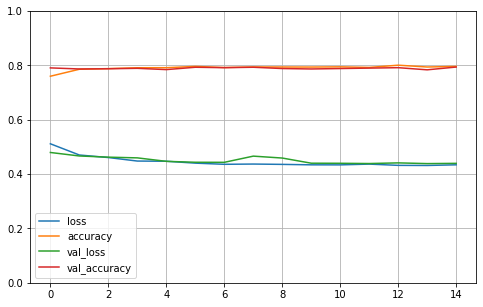

In [247]:
pd.DataFrame(hist1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [248]:
relu_model.evaluate(Xts,yts)

22/22 [==============================] - 0s 2ms/step - loss: 0.4557 - accuracy: 0.7685


[0.455716609954834, 0.7684659361839294]

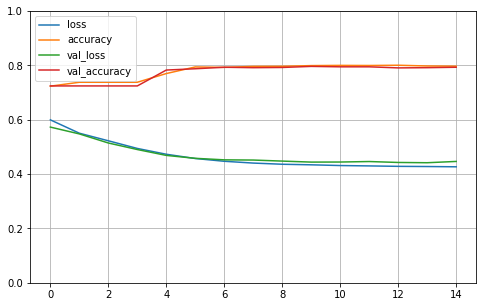

In [249]:
pd.DataFrame(hist2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [252]:
sgm_model.evaluate(Xts,yts)

22/22 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7784


[0.46121034026145935, 0.7784090638160706]

Karena sigmoid lebih terlihat tidak overfitting maka saya akan pakai sigmoid.

## Membandingkan optimizer adam dan sgd dengan cara hyperparameter tuning

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [253]:
def clayers(optimizer='adam'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(10,input_dim=14,kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='relu'))
  model.add(keras.layers.Dense(10,kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='relu'))
  model.add(keras.layers.Dense(5,kernel_initializer=tf.keras.initializers.GlorotNormal(), activation='relu'))
    # Output layer
  model.add(keras.layers.Dense(2, activation="softmax"))
  
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return model

  return model

In [254]:
kerc=keras.wrappers.scikit_learn.KerasClassifier(build_fn=clayers)

In [255]:
pipe=Pipeline([('preprocess', StandardScaler())])

In [256]:
#from scipy.stats import reciprocal
param_distribs = {
    "optimizer": ['adam', 'sgd']
}

In [257]:
from sklearn.model_selection import RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(kerc, param_distribs, n_iter=5, cv=3, verbose=2)
rnd_search_cv.fit(pipe.fit_transform(Xtr), ytr, epochs=15, validation_data=(pipe.transform(Xva), yva))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] optimizer=adam ..................................................
Epoch 1/15
106/106 [==============================] - 1s 3ms/step - loss: 0.5727 - accuracy: 0.7270 - val_loss: 0.5113 - val_accuracy: 0.7227
Epoch 2/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7416 - val_loss: 0.4747 - val_accuracy: 0.7551
Epoch 3/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7573 - val_loss: 0.4663 - val_accuracy: 0.7615
Epoch 4/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.7573 - val_loss: 0.4634 - val_accuracy: 0.7567
Epoch 5/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7635 - val_loss: 0.4604 - val_accuracy: 0.7804
Epoch 6/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.7739 - val_loss: 0.4590 - val_accuracy: 0.7844
Epoch 7/15
106/106

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


106/106 [==============================] - 1s 3ms/step - loss: 0.5605 - accuracy: 0.7461 - val_loss: 0.5046 - val_accuracy: 0.7449
Epoch 2/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4646 - accuracy: 0.7644 - val_loss: 0.4749 - val_accuracy: 0.7686
Epoch 3/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.7926 - val_loss: 0.4675 - val_accuracy: 0.7686
Epoch 4/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.7926 - val_loss: 0.4617 - val_accuracy: 0.7788
Epoch 5/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.7961 - val_loss: 0.4575 - val_accuracy: 0.7773
Epoch 6/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.7985 - val_loss: 0.4555 - val_accuracy: 0.7765
Epoch 7/15
106/106 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.7973 - val_loss: 0.4534 - val_accuracy: 0.7780
Epoch 8/15
106/10

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   26.2s finished


159/159 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.6282 - val_loss: 0.6379 - val_accuracy: 0.7275
Epoch 2/15
159/159 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7418 - val_loss: 0.4854 - val_accuracy: 0.7393
Epoch 3/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7819 - val_loss: 0.4645 - val_accuracy: 0.7804
Epoch 4/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.7914 - val_loss: 0.4599 - val_accuracy: 0.7804
Epoch 5/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.7912 - val_loss: 0.4506 - val_accuracy: 0.7844
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7938 - val_loss: 0.4495 - val_accuracy: 0.7820
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7959 - val_loss: 0.4457 - val_accuracy: 0.7859
Epoch 8/15
159/15

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f215caa0e50>,
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'optimizer': ['adam', 'sgd']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [258]:
rnd_search_cv.best_params_

{'optimizer': 'adam'}

In [309]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [260]:
best_par = rnd_search_cv.best_params_
best=clayers(**best_par)

In [310]:
hist_again1 = best.fit(pipe.fit_transform(Xtr), ytr, epochs=50, validation_data=(pipe.transform(Xva), yva))

Epoch 1/50
159/159 [==============================] - 1s 3ms/step - loss: 0.4070 - accuracy: 0.8094 - val_loss: 0.4393 - val_accuracy: 0.7954
Epoch 2/50
159/159 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.8123 - val_loss: 0.4386 - val_accuracy: 0.7899
Epoch 3/50
159/159 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8107 - val_loss: 0.4387 - val_accuracy: 0.7883
Epoch 4/50
159/159 [==============================] - 0s 3ms/step - loss: 0.4067 - accuracy: 0.8107 - val_loss: 0.4436 - val_accuracy: 0.7891
Epoch 5/50
159/159 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8121 - val_loss: 0.4398 - val_accuracy: 0.7923
Epoch 6/50
159/159 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.8107 - val_loss: 0.4408 - val_accuracy: 0.7907
Epoch 7/50
159/159 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8121 - val_loss: 0.4394 - val_accuracy: 0.7923
Epoch 

## FUnctional API

In [265]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [273]:
def f_layers(optimizer='adam'):
  input_ = keras.layers.Input(shape=Xtr.shape[1:])
  hidden1 = keras.layers.Dense(10, activation="relu")(input_)
  hidden2 = keras.layers.Dense(10, activation="relu")(hidden1)
  concat = keras.layers.concatenate([input_, hidden2])
  output = keras.layers.Dense(2)(concat)
  modelAPI = keras.models.Model(inputs=[input_], outputs=[output])
  
  modelAPI.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return modelAPI

In [274]:
kerc2=keras.wrappers.scikit_learn.KerasClassifier(build_fn=f_layers)

In [275]:
from sklearn.model_selection import RandomizedSearchCV
rnd_search_cv = RandomizedSearchCV(kerc2, param_distribs, n_iter=5, cv=3, verbose=2)
rnd_search_cv.fit(pipe.fit_transform(Xtr), ytr, epochs=15, validation_data=(pipe.transform(Xva), yva))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] optimizer=adam ..................................................
Epoch 1/15
106/106 [==============================] - 1s 4ms/step - loss: 2.4786 - accuracy: 0.5940 - val_loss: 2.2263 - val_accuracy: 0.6311
Epoch 2/15
106/106 [==============================] - 0s 2ms/step - loss: 1.9182 - accuracy: 0.6295 - val_loss: 1.9049 - val_accuracy: 0.6556
Epoch 3/15
106/106 [==============================] - 0s 3ms/step - loss: 1.6385 - accuracy: 0.6491 - val_loss: 1.6853 - val_accuracy: 0.6746
Epoch 4/15
106/106 [==============================] - 0s 2ms/step - loss: 1.5055 - accuracy: 0.6541 - val_loss: 1.5682 - val_accuracy: 0.6730
Epoch 5/15
106/106 [==============================] - 0s 2ms/step - loss: 1.4546 - accuracy: 0.6574 - val_loss: 1.6391 - val_accuracy: 0.6682
Epoch 6/15
106/106 [==============================] - 0s 2ms/step - loss: 1.4264 - accuracy: 0.6550 - val_loss: 1.3686 - val_accuracy: 0.6698
Epoch 7/15
106/106

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


106/106 [==============================] - 1s 4ms/step - loss: 1.7714 - accuracy: 0.6356 - val_loss: 1.6037 - val_accuracy: 0.6051
Epoch 2/15
106/106 [==============================] - 0s 2ms/step - loss: 1.4326 - accuracy: 0.6427 - val_loss: 1.4536 - val_accuracy: 0.6406
Epoch 3/15
106/106 [==============================] - 0s 2ms/step - loss: 1.3718 - accuracy: 0.6480 - val_loss: 1.3099 - val_accuracy: 0.6280
Epoch 4/15
106/106 [==============================] - 0s 2ms/step - loss: 1.1455 - accuracy: 0.6056 - val_loss: 1.2345 - val_accuracy: 0.5703
Epoch 5/15
106/106 [==============================] - 0s 2ms/step - loss: 1.0190 - accuracy: 0.5807 - val_loss: 1.1556 - val_accuracy: 0.6019
Epoch 6/15
106/106 [==============================] - 0s 2ms/step - loss: 0.9917 - accuracy: 0.5843 - val_loss: 1.1295 - val_accuracy: 0.5197
Epoch 7/15
106/106 [==============================] - 0s 2ms/step - loss: 0.9599 - accuracy: 0.5662 - val_loss: 1.1059 - val_accuracy: 0.5924
Epoch 8/15
106/10

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   28.5s finished


159/159 [==============================] - 1s 3ms/step - loss: 2.1179 - accuracy: 0.5808 - val_loss: 1.5105 - val_accuracy: 0.5284
Epoch 2/15
159/159 [==============================] - 0s 2ms/step - loss: 1.0707 - accuracy: 0.5188 - val_loss: 0.9737 - val_accuracy: 0.5087
Epoch 3/15
159/159 [==============================] - 0s 2ms/step - loss: 0.8064 - accuracy: 0.4820 - val_loss: 0.7370 - val_accuracy: 0.4566
Epoch 4/15
159/159 [==============================] - 0s 2ms/step - loss: 0.6985 - accuracy: 0.4471 - val_loss: 0.7096 - val_accuracy: 0.4637
Epoch 5/15
159/159 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.4520 - val_loss: 0.6924 - val_accuracy: 0.4605
Epoch 6/15
159/159 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.4492 - val_loss: 0.6835 - val_accuracy: 0.4589
Epoch 7/15
159/159 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.4682 - val_loss: 0.6908 - val_accuracy: 0.4779
Epoch 8/15
159/15

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2165782190>,
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'optimizer': ['adam', 'sgd']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [311]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [312]:
best_par = rnd_search_cv.best_params_
best2=f_layers(**best_par)
hist_again2 = best2.fit(pipe.fit_transform(Xtr), ytr, epochs=50, validation_data=(pipe.transform(Xva), yva))

Epoch 1/50
159/159 [==============================] - 1s 3ms/step - loss: 1.7948 - accuracy: 0.6363 - val_loss: 1.3108 - val_accuracy: 0.7417
Epoch 2/50
159/159 [==============================] - 0s 2ms/step - loss: 1.0165 - accuracy: 0.7392 - val_loss: 0.8551 - val_accuracy: 0.7670
Epoch 3/50
159/159 [==============================] - 0s 2ms/step - loss: 1.1233 - accuracy: 0.6902 - val_loss: 1.1301 - val_accuracy: 0.6635
Epoch 4/50
159/159 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.6659 - val_loss: 0.8601 - val_accuracy: 0.6540
Epoch 5/50
159/159 [==============================] - 0s 2ms/step - loss: 0.8517 - accuracy: 0.6626 - val_loss: 0.9356 - val_accuracy: 0.6738
Epoch 6/50
159/159 [==============================] - 0s 2ms/step - loss: 1.2820 - accuracy: 0.6169 - val_loss: 2.7426 - val_accuracy: 0.2820
Epoch 7/50
159/159 [==============================] - 0s 2ms/step - loss: 1.7779 - accuracy: 0.2863 - val_loss: 1.3615 - val_accuracy: 0.3318
Epoch 

# Model Inference

In [280]:
new

,SeniorCitizen,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No
3375,0,1,71,0,0,0,0,0,0,0,19.90,0,0,1
168,1,0,58,0,0,1,1,0,0,1,45.30,1,0,0
6360,0,0,1,0,0,0,0,0,0,0,20.30,0,0,1
3467,1,0,5,0,0,0,0,0,1,1,91.40,0,1,0
1378,0,1,58,1,0,1,0,0,1,0,66.80,1,0,0
3159,1,0,3,1,0,0,0,0,1,1,94.85,0,1,0
3582,0,0,3,0,0,0,0,0,1,0,80.50,0,1,0
1745,0,1,56,0,0,0,0,0,0,0,19.80,0,0,1
639,0,0,10,1,0,0,0,0,0,1,85.25,0,1,0
6225,0,1,72,1,1,1,1,1,1,0,106.10,0,1,0


In [304]:
new=X.sample(10)
np.argmax(glorot_model.predict(new), axis=-1)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Kesimpulan

EDA:
1. Dari hasil distribusi, SeniorCitizen terlihat diskrit karena berupa kategorikal, tenure, TotalCharges dan MonthlyCharges skewed ke kanan. 
2. Data dari pelanggan kebanyakan bukan Senior. Kebanyakan Customer yang churn nya Yes itu yg tenure nya sekutaran 0 sampai 30, dan MonthlyCharges nya sekitaran 60-80.
3. Gender terlihat seimbang.
4. SeniorCitizen yang memiliki partner dan tidak terlihat hampir seimbang. Sementara untuk tenure nya customer yang mempunyai partner disekitaran 20-60.
5. Kebanyakan customer yang churned adalah yang InternetService nya Fiber optic, lalu customer yang tidak mengambil OnlineSecurity, Orang yang tidak memiliki OnlineBackup, DeviceProtection, TechSupport, StreamingTV dan StreamingMovies. Terakhir, orang yang mengambil PhoneService lebuhbanyak yang churned.
6. Orang yang tenurenya sekitaran 0-30 kontraknya lebih banyak yang Month-to-month. Orang yang tenurenya 20-60 contractnya lebih banyak One year. dan sisanya lebih banyak yang ambil Two Year.
7. tenure dan MonthlyCharges sama-sama berkorelasi dengan TotalCharges. Ini karena TotalCharges bergantung sama tenure dan MonthlyCharge. naiknya tenure dan MonthlyCharges menyebabkan bertambahnya TotalCharges.
8. ebanyakan orang yang StreamingTV dan Streaming Movies MonthlyCharges nya lebih banyak daripada yang tidak. Kebanyakan yang InternetService_Fiber optik MonthlyCharges nya lebih banyak.



Model Analisis:
1. Glorot Initializer terlihat lebih baik untuk data ini karena tidak overfitting.
2. Untuk activation function lebih baik yang sigmoid.
3. Untuk optimizer lebih baik adam